In [1]:
import numpy as np
import pandas as pd

In [2]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')

In [3]:
dados

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [4]:
dados.drop(columns=['Unnamed: 0'], inplace = True)

In [5]:
dados['sold'] = dados['sold'].apply(lambda x: 1 if x == 'yes' else 0)

In [6]:
from datetime import datetime

In [7]:
today = datetime.now()
year  = today.year

In [8]:
dados['age_model'] = year - dados['model_year']

In [9]:
dados['km_year'] = dados['mileage_per_year'] * 1.60934

In [10]:
dados.drop(columns=['mileage_per_year','model_year'],inplace = True)

In [11]:
dados = dados[['age_model','km_year','price','sold']]

In [12]:
dados

,age_model,km_year,price,sold
0,22,35085.22134,30941.02,1
1,24,12622.05362,40557.96,1
2,16,11440.79806,89627.50,0
3,7,43167.32682,95276.14,0
4,8,12770.11290,117384.68,1
...,...,...,...,...
9995,16,25060.64248,97112.86,0
9996,20,21317.31764,107424.63,1
9997,8,20950.38812,93856.99,0
9998,11,16840.13376,51250.57,1


In [13]:
x = dados[['age_model','km_year','price']]
y = dados['sold']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [15]:
SEED = 5
np.random.seed(SEED)

In [16]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.25, stratify = y)
print(f'Treinaremos com {len(train_x)} dados e testaremos com {len(test_x)}')

Treinaremos com 7500 dados e testaremos com 2500


In [17]:
modelo = LinearSVC()
modelo.fit(train_x,train_y)
predict = modelo.predict(test_x)

C:\Users\thanael.butewicz\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [18]:
accuracy = accuracy_score(test_y, predict) * 100
accuracy

46.88

## Dummy Estimator
Estimador bobo

In [19]:
from sklearn.dummy import DummyClassifier

In [20]:
dummy_stratified = DummyClassifier()

dummy_stratified.fit(train_x,train_y)
predict = dummy_stratified.predict(test_x)

In [21]:
accuracy = accuracy_score(test_y, predict)*100
accuracy

57.99999999999999

# SVC

In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [23]:
SEED = 5
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_train_x), len(raw_test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x  = scaler.transform(raw_test_x)


modelo = SVC(gamma='auto')
modelo.fit(train_x,train_y)
predict = modelo.predict(test_x)

accuracy = accuracy_score(test_y, predict) * 100
accuracy

Treinaremos com 7500 elementos e testaremos com 2500 elementos


77.48

# Decision Tree Classifier
algoritmos que mostram o porque das motivos, chama-se de arvore de decisões

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
EED = 5
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_train_x), len(raw_test_x)))


modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(raw_train_x,train_y)
predict = modelo.predict(raw_test_x)

accuracy = accuracy_score(test_y, predict)*100
accuracy

Treinaremos com 7500 elementos e testaremos com 2500 elementos


79.28

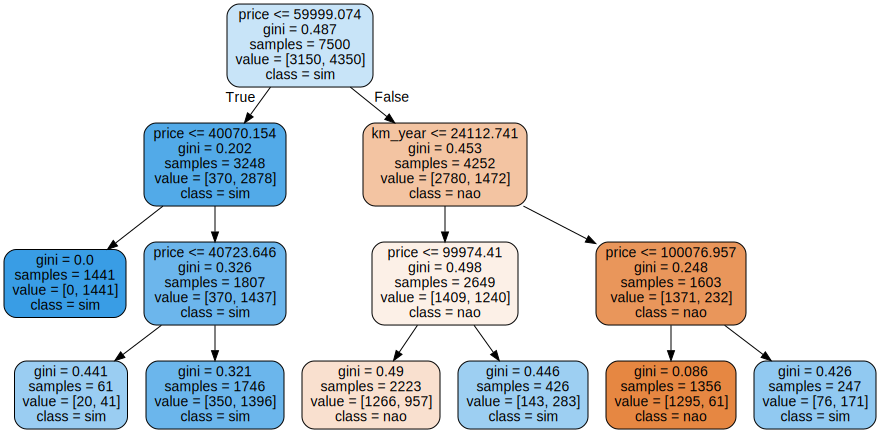

In [40]:
from sklearn.tree import  export_graphviz
import graphviz

features = x.columns 

dot_data = export_graphviz(
    modelo, 
    out_file=None,
    feature_names=features,
    filled=True,
    rounded=True,
    class_names=['nao','sim'])
grafico = graphviz.Source(dot_data)
grafico